In [ ]:
"""
*워드 임베딩 : 단어를밀집 벡터의 형태로 표현
-희소표현 : 원핫 인코딩
-밀집표현 : 희소표현 문제 보완(실수를 사용함으로 차원 줄여 표현)

*워드 투 벡터 - 단어 벡터 간 유사도 반영하도록 단어의 의미를 수치화
- 은닉층이 다수인 딥러닝모델이 아닌 은닉층 1개인 얕은 신경망이다
- 활성화 함수 없으며, 룩업 테이블이라는 연산 담당하는 투사층(projection layer)으로 구성
- 투사층의 크기가 출력층으로 나오는 각 단어의 임베딩 벡터의 차원이 된다
- 단어들간의 관계를 바탕으로 벡터 공간에 표현
- 입력층과 투사층 사이 가중치 W는 V * M행렬이며 V:단어 집합 크기. M:임베딩 차원이다.
- 투사층에서 출력층 사이 가중치는 M * V임
- CBOW :주변 단어이용해 중간 단어 예측
- soft 함수 지나면서 벡터의 각 원소들의 값은 0과 1사이의 실수록 합이 1이도미
- 윈도우 크기가 얼마냐에 따라 성능 바뀜(CBOW기준 왼쪽 오른쪽 몇개씩 선택할것인가 -> 윈도우 2개면 왼,오 2개씩 선택)
- 출력층에는 예측한 단어가 원핫벡터로 나오게됨

"""

In [38]:
import re
import urllib.request
import zipfile
from lxml import etree
from nltk.tokenize import word_tokenize, sent_tokenize

In [2]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/09.%20Word%20Embedding/dataset/ted_en-20160408.xml", filename="ted_en-20160408.xml")

('ted_en-20160408.xml', <http.client.HTTPMessage at 0x7d2f9debd450>)

In [3]:
targetXML =open('ted_en-20160408.xml', 'r')

In [4]:
targetXML

<_io.TextIOWrapper name='ted_en-20160408.xml' mode='r' encoding='UTF-8'>

In [6]:
target_text=etree.parse(targetXML)

In [7]:
target_text

In [12]:
parse_text = '\n'.join(target_text.xpath("//content/text()")) #줄바꿈 문자 넣어줌

In [13]:
parse_text

Output hidden; open in https://colab.research.google.com to view.

In [14]:
content_text = re.sub(r'\([^)]*\)', '', parse_text)

^가 있으면 뒤에 따라오는 애 부정함으로 닫는괄호 빼놓고  어떤 문자가 와도 된다 = 닫는 괄호는 포함이 안된다 or ()로 묶인 내용 모두 제거 ,' '를 씀으로써 빈문자열로 바꿔라 의미

In [16]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [17]:
sent_text = sent_tokenize(content_text)

In [18]:
sent_text

["Here are two reasons companies fail: they only do more of the same, or they only do what's new.",
 'To me the real, real solution to quality growth is figuring out the balance between two activities: exploration and exploitation.',
 'Both are necessary, but it can be too much of a good thing.',
 'Consider Facit.',
 "I'm actually old enough to remember them.",
 'Facit was a fantastic company.',
 'They were born deep in the Swedish forest, and they made the best mechanical calculators in the world.',
 'Everybody used them.',
 'And what did Facit do when the electronic calculator came along?',
 'They continued doing exactly the same.',
 'In six months, they went from maximum revenue ... and they were gone.',
 'Gone.',
 'To me, the irony about the Facit story is hearing about the Facit engineers, who had bought cheap, small electronic calculators in Japan that they used to double-check their calculators.',
 'Facit did too much exploitation.',
 'But exploration can go wild, too.',
 'A few

In [19]:
normalized_text = []
for string in sent_text:
     tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
     normalized_text.append(tokens)

string 안에 텍스트를 소문자로 먼저 바꿔주고 영어,숫자가 아닌거 빈공백으로

In [20]:
   normalized_text

['here are two reasons companies fail they only do more of the same or they only do what s new ',
 'to me the real real solution to quality growth is figuring out the balance between two activities exploration and exploitation ',
 'both are necessary but it can be too much of a good thing ',
 'consider facit ',
 'i m actually old enough to remember them ',
 'facit was a fantastic company ',
 'they were born deep in the swedish forest and they made the best mechanical calculators in the world ',
 'everybody used them ',
 'and what did facit do when the electronic calculator came along ',
 'they continued doing exactly the same ',
 'in six months they went from maximum revenue and they were gone ',
 'gone ',
 'to me the irony about the facit story is hearing about the facit engineers who had bought cheap small electronic calculators in japan that they used to double check their calculators ',
 'facit did too much exploitation ',
 'but exploration can go wild too ',
 'a few years back i w

In [21]:
result = [word_tokenize(sentence) for sentence in normalized_text]

In [23]:
len(result)  #273424문장, 54775 유일한 단어
result에 저장된 유일한 단어의 개수?
result

Object `개수` not found.


[['here',
  'are',
  'two',
  'reasons',
  'companies',
  'fail',
  'they',
  'only',
  'do',
  'more',
  'of',
  'the',
  'same',
  'or',
  'they',
  'only',
  'do',
  'what',
  's',
  'new'],
 ['to',
  'me',
  'the',
  'real',
  'real',
  'solution',
  'to',
  'quality',
  'growth',
  'is',
  'figuring',
  'out',
  'the',
  'balance',
  'between',
  'two',
  'activities',
  'exploration',
  'and',
  'exploitation'],
 ['both',
  'are',
  'necessary',
  'but',
  'it',
  'can',
  'be',
  'too',
  'much',
  'of',
  'a',
  'good',
  'thing'],
 ['consider', 'facit'],
 ['i', 'm', 'actually', 'old', 'enough', 'to', 'remember', 'them'],
 ['facit', 'was', 'a', 'fantastic', 'company'],
 ['they',
  'were',
  'born',
  'deep',
  'in',
  'the',
  'swedish',
  'forest',
  'and',
  'they',
  'made',
  'the',
  'best',
  'mechanical',
  'calculators',
  'in',
  'the',
  'world'],
 ['everybody', 'used', 'them'],
 ['and',
  'what',
  'did',
  'facit',
  'do',
  'when',
  'the',
  'electronic',
  'calcu

In [44]:
counts=[]
for i in range(len(result)):
  counts+=set(result[i])
len(set(counts))

54775

In [38]:
unique_word=[]
for i in range(len(result)):
  unique_word.extend(set(result[i]))

In [39]:
len(set(unique_word))

54775

In [45]:
len(set([word for sentence in result for word in sentence]))

54775

In [47]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

In [49]:
model = Word2Vec(sentences=result, vector_size=100, window=5, min_count=5, sg=0, workers = 4)
#mincount=최소 등장 횟수, 최소 몇번은 나와야 임베딩함
#sg=0 이면 CBOW로 하겠다 의미

In [51]:
model. wv.most_similar('phone')

[('card', 0.7207064032554626),
 ('phones', 0.7066526412963867),
 ('license', 0.6469040513038635),
 ('facebook', 0.6366079449653625),
 ('smartphone', 0.621044933795929),
 ('telephone', 0.6201725006103516),
 ('camera', 0.6133012175559998),
 ('car', 0.6087337136268616),
 ('mobile', 0.6056689023971558),
 ('file', 0.6040796637535095)]

In [52]:
model.wv.save_word2vec_format('eng_w2v')

In [54]:
loaded_model=KeyedVectors.load_word2vec_format('eng_w2v')

In [55]:
loaded_model.most_similar('money')

[('attention', 0.6167928576469421),
 ('credit', 0.5946491956710815),
 ('cash', 0.586269199848175),
 ('rent', 0.5762515664100647),
 ('jobs', 0.5652716159820557),
 ('budget', 0.5615863800048828),
 ('food', 0.5563368797302246),
 ('tax', 0.5538343191146851),
 ('effort', 0.551331102848053),
 ('dollars', 0.5479384660720825)]

In [57]:
#1. 파이프라인 (자동화, 주기적)
#2. 파인튜닝(추가학습모델)

In [58]:
pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 35.6 MB/s eta 0:00:00


In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [60]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x7d2f640352d0>)

In [63]:
train_data = pd.read_table('ratings.txt')

In [64]:
train_data

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1
...,...,...,...
199995,8963373,포켓 몬스터 짜가 ㅡㅡ;;,0
199996,3302770,쓰.레.기,0
199997,5458175,완전 사이코영화. 마지막은 더욱더 이 영화의질을 떨어트린다.,0
199998,6908648,왜난 재미없었지 ㅠㅠ 라따뚜이 보고나서 스머프 봐서 그런가 ㅋㅋ,0


In [65]:
train_data = train_data.dropna(how='any')

In [66]:
print(len(train_data))

199992


In [68]:
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
#한글 문자 제외한것 공백으로

<ipython-input-68-7e7882417767>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
<ipython-input-68-7e7882417767>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


In [69]:
train_data[:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1


In [70]:
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()

In [ ]:
#konlpy.org -> api -> okt -> 함수

In [72]:
train_data['document'][0]

'어릴때보고 지금다시봐도 재밌어요ㅋㅋ'

In [73]:
okt.morphs(train_data['document'][0])

['어릴', '때', '보고', '지금', '다시', '봐도', '재밌어요', 'ㅋㅋ']

In [74]:
okt.morphs(train_data['document'][0], stem=True)
#어간 추출 작업

['어리다', '때', '보고', '지금', '다시', '보다', '재밌다', 'ㅋㅋ']

In [72]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [73]:
from tqdm import tqdm

In [79]:
tokenized_data = []
for sentence in tqdm(train_data['document']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)

100%|██████████| 199992/199992 [38:04<00:00, 87.56it/s]


In [80]:
from gensim.models import Word2Vec

model = Word2Vec(sentences = tokenized_data, vector_size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

In [81]:
model.wv.vectors.shape

(16477, 100)

In [82]:
print(model.wv.most_similar("쓰레기"))

[('삼류', 0.6582520008087158), ('류', 0.5634874105453491), ('똥', 0.5634560585021973), ('ㅄ', 0.5411604642868042), ('졸작', 0.5385759472846985), ('거지같다', 0.5210428833961487), ('최악', 0.49582576751708984), ('개똥', 0.49512821435928345), ('베스트', 0.48686397075653076), ('ㅉㅉ', 0.4834820032119751)]


In [83]:
import gensim
import urllib.request

In [84]:
import gensim.downloader as api

wv = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [86]:
print(wv.similarity('this', 'is'))
print(wv.similarity('post', 'book'))

0.40797037
0.057204384


In [89]:
model.wv.save_word2vec_format('kor_w2v')

In [90]:
!python -m gensim.scripts.word2vec2tensor --input kor_w2v --output kor_w2v

2023-11-08 06:33:55,575 - word2vec2tensor - INFO - running /usr/local/lib/python3.10/dist-packages/gensim/scripts/word2vec2tensor.py --input kor_w2v --output kor_w2v
2023-11-08 06:33:55,576 - keyedvectors - INFO - loading projection weights from kor_w2v
2023-11-08 06:33:56,731 - utils - INFO - KeyedVectors lifecycle event {'msg': 'loaded (16477, 100) matrix of type float32 from kor_w2v', 'binary': False, 'encoding': 'utf8', 'datetime': '2023-11-08T06:33:56.729911', 'gensim': '4.3.2', 'python': '3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]', 'platform': 'Linux-5.15.120+-x86_64-with-glibc2.35', 'event': 'load_word2vec_format'}
2023-11-08 06:33:58,007 - word2vec2tensor - INFO - 2D tensor file saved to kor_w2v_tensor.tsv
2023-11-08 06:33:58,007 - word2vec2tensor - INFO - Tensor metadata file saved to kor_w2v_metadata.tsv
2023-11-08 06:33:58,008 - word2vec2tensor - INFO - finished running word2vec2tensor.py


In [1]:
######################과제#########################

In [42]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from selenium import webdriver
import konlpy
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [3]:
driver = webdriver.Chrome()

In [4]:
url='https://biz.chosun.com/stock/stock_general/2023/11/06/GTMCKAVAC5BUXJ5BZIO2IXFXDQ/?utm_source=naver&utm_medium=original&utm_campaign=biz'
driver.get(url)

In [6]:
html=driver.page_source
soup=BeautifulSoup(html,'html.parser')

<html lang="ko"><head><meta charset="utf-8"/><meta content="width=device-width,initial-scale=1" name="viewport"/><title>[특징주] ‘살인 진드기 감염병 치료에 효과’ 현대바이오, 14%대 급등 - 조선비즈</title><link href="https://biz.chosun.com/stock/stock_general/2023/11/06/GTMCKAVAC5BUXJ5BZIO2IXFXDQ/" rel="canonical"/><meta content="특징주 살인 진드기 감염병 치료에 효과 현대바이오, 14%대 급등  현대바이오사이언스현대바이오의 코로나19 치료제인 제프티CP-COV03가 살인 진드기 바이러스SFTS 바이러스 관련 질환에도 치료 효과가 있다고 발표되자, 주가가 6일 장 초반 강세다. 이날 오전 10시" name="description"/><meta content="코스피, 코스닥, 증권" name="keywords"/><meta content="코스피, 코스닥, 증권" name="news_keywords"/><link href="https://biz.chosun.com/stock/stock_general/2023/11/06/GTMCKAVAC5BUXJ5BZIO2IXFXDQ/?outputType=amp" rel="amphtml"/><meta content="https://biz.chosun.com/resizer/YP9wCenmIqVmIAL9OPurn8r6gHo=/1170x614/smart/cloudfront-ap-northeast-1.images.arcpublishing.com/chosunbiz/TCITTZUA3TV24WATSZZTUR7G3U.jpg" property="og:image"/><meta content="article" property="og:type"/><meta content="https://biz.chosun.com/stock/stock_genera
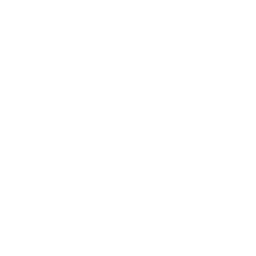
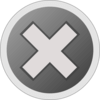
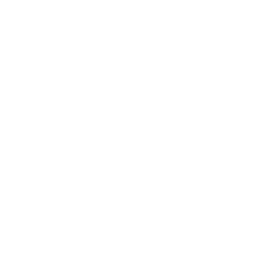
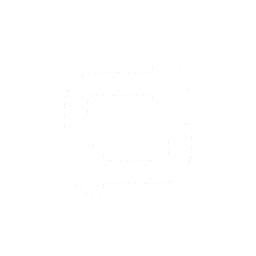
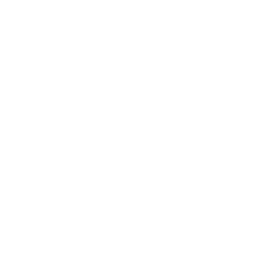

In [7]:
soup

In [61]:
news=soup.select("div.layout-main > section.grid > article > section.article-body")




In [62]:
news=news[0].text

In [63]:
news

'현대바이오사이언스(현대바이오)의 코로나19 치료제인 ‘제프티(CP-COV03)’가 살인 진드기 바이러스(SFTS 바이러스) 관련 질환에도 치료 효과가 있다고 발표되자, 주가가 6일 장 초반 강세다.현대바이오 전경. /뉴스1이날 오전 10시 5분 기준 현대바이오(32,450원 ▼ 1,050 -3.13%)는 전 거래일 대비 4400원(14.10%) 오른 3만5600원에 거래되고 있다.현대바이오는 지난 2일 열린 ‘2023 대한감염학회·대한항균요법학회 추계학술대회’에서 살인진드기 바이러스로 인한 급성 질환인 중증열성혈소판감소증후군(SFTS)에 대해 제프티가 치료 효과가 있다는 내용의 연구 결과가 발표됐다고 밝혔다.해당 연구를 진행한 연세대 의대 감염내과 연구팀은 “세포실험을 통해 ‘SFTS 바이러스 증식을 50% 억제하는 데 필요한 니클로사마이드 농도’(IC50)가 0.125μM로 나타났다”고 설명했다. 이 농도는 코로나19 바이러스에 대한 니클로사마이드의 IC50값(0.28μM)의 절반 정도에 해당한다.제프티가 SFTS에 효능이 있는 것으로 밝혀지면서, 연세대 의대 감염내과 연구팀은 식품의약품안전처에 ‘SFTS에 대한 제프티의 연구자임상시험’ 승인을 신청할 예정이다.한편 SFTS는 질병관리청이 지정한 제3급 감염병이다. 고열, 혈소판 감소, 구토, 백혈구 감소 등의 증상이 발현되고, 중증의 경우 근육 떨림, 혼동, 혼수 등 신경계 증상이 나타난다. 한국, 중국, 일본, 파키스탄, 베트남, 대만, 태국, 미얀마 등 아시아에서 주로 발생하며, 진드기에 의해 감염되는 것으로 알려져 있다.'

In [50]:
#parse_text = '\n'.join(news.xpath("//content/text()")) #줄바꿈 문자 넣어줌
#parse_text
#news.str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣]','')
news_text=re.sub(r'\([^)]*\)','',news)
#content_text = re.sub(r'\([^)]*\)', '', news)

In [51]:
news_text

'현대바이오사이언스의 코로나19 치료제인 ‘제프티’가 살인 진드기 바이러스 관련 질환에도 치료 효과가 있다고 발표되자, 주가가 6일 장 초반 강세다.현대바이오 전경. /뉴스1이날 오전 10시 5분 기준 현대바이오는 전 거래일 대비 4400원 오른 3만5600원에 거래되고 있다.현대바이오는 지난 2일 열린 ‘2023 대한감염학회·대한항균요법학회 추계학술대회’에서 살인진드기 바이러스로 인한 급성 질환인 중증열성혈소판감소증후군에 대해 제프티가 치료 효과가 있다는 내용의 연구 결과가 발표됐다고 밝혔다.해당 연구를 진행한 연세대 의대 감염내과 연구팀은 “세포실험을 통해 ‘SFTS 바이러스 증식을 50% 억제하는 데 필요한 니클로사마이드 농도’가 0.125μM로 나타났다”고 설명했다. 이 농도는 코로나19 바이러스에 대한 니클로사마이드의 IC50값의 절반 정도에 해당한다.제프티가 SFTS에 효능이 있는 것으로 밝혀지면서, 연세대 의대 감염내과 연구팀은 식품의약품안전처에 ‘SFTS에 대한 제프티의 연구자임상시험’ 승인을 신청할 예정이다.한편 SFTS는 질병관리청이 지정한 제3급 감염병이다. 고열, 혈소판 감소, 구토, 백혈구 감소 등의 증상이 발현되고, 중증의 경우 근육 떨림, 혼동, 혼수 등 신경계 증상이 나타난다. 한국, 중국, 일본, 파키스탄, 베트남, 대만, 태국, 미얀마 등 아시아에서 주로 발생하며, 진드기에 의해 감염되는 것으로 알려져 있다.'

In [65]:
news_text=news_text.split('.')
news_text = '\n'.join(news_text)

In [70]:
news_text

'현대바이오사이언스의 코로나19 치료제인 ‘제프티’가 살인 진드기 바이러스 관련 질환에도 치료 효과가 있다고 발표되자, 주가가 6일 장 초반 강세다.현대바이오 전경. /뉴스1이날 오전 10시 5분 기준 현대바이오는 전 거래일 대비 4400원 오른 3만5600원에 거래되고 있다.현대바이오는 지난 2일 열린 ‘2023 대한감염학회·대한항균요법학회 추계학술대회’에서 살인진드기 바이러스로 인한 급성 질환인 중증열성혈소판감소증후군에 대해 제프티가 치료 효과가 있다는 내용의 연구 결과가 발표됐다고 밝혔다.해당 연구를 진행한 연세대 의대 감염내과 연구팀은 “세포실험을 통해 ‘SFTS 바이러스 증식을 50% 억제하는 데 필요한 니클로사마이드 농도’가 0.125μM로 나타났다”고 설명했다. 이 농도는 코로나19 바이러스에 대한 니클로사마이드의 IC50값의 절반 정도에 해당한다.제프티가 SFTS에 효능이 있는 것으로 밝혀지면서, 연세대 의대 감염내과 연구팀은 식품의약품안전처에 ‘SFTS에 대한 제프티의 연구자임상시험’ 승인을 신청할 예정이다.한편 SFTS는 질병관리청이 지정한 제3급 감염병이다. 고열, 혈소판 감소, 구토, 백혈구 감소 등의 증상이 발현되고, 중증의 경우 근육 떨림, 혼동, 혼수 등 신경계 증상이 나타난다. 한국, 중국, 일본, 파키스탄, 베트남, 대만, 태국, 미얀마 등 아시아에서 주로 발생하며, 진드기에 의해 감염되는 것으로 알려져 있다.'

In [67]:
news_text=re.sub(r'\([^)]*\)','',news)

In [68]:
news_text

'현대바이오사이언스의 코로나19 치료제인 ‘제프티’가 살인 진드기 바이러스 관련 질환에도 치료 효과가 있다고 발표되자, 주가가 6일 장 초반 강세다.현대바이오 전경. /뉴스1이날 오전 10시 5분 기준 현대바이오는 전 거래일 대비 4400원 오른 3만5600원에 거래되고 있다.현대바이오는 지난 2일 열린 ‘2023 대한감염학회·대한항균요법학회 추계학술대회’에서 살인진드기 바이러스로 인한 급성 질환인 중증열성혈소판감소증후군에 대해 제프티가 치료 효과가 있다는 내용의 연구 결과가 발표됐다고 밝혔다.해당 연구를 진행한 연세대 의대 감염내과 연구팀은 “세포실험을 통해 ‘SFTS 바이러스 증식을 50% 억제하는 데 필요한 니클로사마이드 농도’가 0.125μM로 나타났다”고 설명했다. 이 농도는 코로나19 바이러스에 대한 니클로사마이드의 IC50값의 절반 정도에 해당한다.제프티가 SFTS에 효능이 있는 것으로 밝혀지면서, 연세대 의대 감염내과 연구팀은 식품의약품안전처에 ‘SFTS에 대한 제프티의 연구자임상시험’ 승인을 신청할 예정이다.한편 SFTS는 질병관리청이 지정한 제3급 감염병이다. 고열, 혈소판 감소, 구토, 백혈구 감소 등의 증상이 발현되고, 중증의 경우 근육 떨림, 혼동, 혼수 등 신경계 증상이 나타난다. 한국, 중국, 일본, 파키스탄, 베트남, 대만, 태국, 미얀마 등 아시아에서 주로 발생하며, 진드기에 의해 감염되는 것으로 알려져 있다.'

In [58]:
okt.morphs(news_text,stem=True)

['현',
 '대',
 '바이오',
 '사이언스',
 '의',
 '코로나',
 '19',
 '치료',
 '제인',
 '‘',
 '제',
 '프티',
 '’',
 '가다',
 '살인',
 '진드기',
 '바이러스',
 '관련',
 '질환',
 '에도',
 '치료',
 '효과',
 '가',
 '있다',
 '발표',
 '되다',
 ',',
 '주가',
 '가',
 '6일',
 '장',
 '초반',
 '강세',
 '다',
 '.',
 '현대',
 '바이오',
 '전경',
 '.',
 '/',
 '뉴스',
 '1',
 '이',
 '날',
 '오전',
 '10시',
 '5분',
 '기준',
 '현',
 '대',
 '바이오',
 '는',
 '전',
 '거래',
 '일',
 '대비',
 '4400원',
 '오른',
 '3만',
 '5600원',
 '에',
 '거래',
 '되다',
 '있다',
 '.',
 '현',
 '대',
 '바이오',
 '는',
 '지난',
 '2일',
 '열리다',
 '‘',
 '2023',
 '대',
 '한',
 '감염',
 '학회',
 '·',
 '대',
 '한',
 '항균',
 '요법',
 '학회',
 '추계',
 '학술',
 '대회',
 '’',
 '에서',
 '살인진드기',
 '바이러스',
 '로',
 '인하다',
 '급성',
 '질환',
 '인',
 '중증',
 '열',
 '성',
 '혈소판',
 '감소',
 '증후군',
 '에',
 '대해',
 '제',
 '프티',
 '가',
 '치료',
 '효과',
 '가',
 '있다',
 '내용',
 '의',
 '연구',
 '결과',
 '가',
 '발표',
 '돼다',
 '밝히다',
 '.',
 '해당',
 '연구',
 '를',
 '진행',
 '한',
 '연세대',
 '의대',
 '감염',
 '내과',
 '연',
 '구',
 '팀',
 '은',
 '“',
 '세포',
 '실험',
 '을',
 '통해',
 '‘',
 'SFTS',
 '바이러스',
 '증식',
 '을',
 '50%',
 '억제',
 '하다'

In [53]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [43]:
okt=Okt()

In [59]:
pos=okt.pos(news_text,stem=True)

In [60]:
pos

[('현', 'Modifier'),
 ('대', 'Modifier'),
 ('바이오', 'Noun'),
 ('사이언스', 'Noun'),
 ('의', 'Josa'),
 ('코로나', 'Noun'),
 ('19', 'Number'),
 ('치료', 'Noun'),
 ('제인', 'Noun'),
 ('‘', 'Foreign'),
 ('제', 'Modifier'),
 ('프티', 'Noun'),
 ('’', 'Punctuation'),
 ('가다', 'Verb'),
 ('살인', 'Noun'),
 ('진드기', 'Noun'),
 ('바이러스', 'Noun'),
 ('관련', 'Noun'),
 ('질환', 'Noun'),
 ('에도', 'Josa'),
 ('치료', 'Noun'),
 ('효과', 'Noun'),
 ('가', 'Josa'),
 ('있다', 'Adjective'),
 ('발표', 'Noun'),
 ('되다', 'Verb'),
 (',', 'Punctuation'),
 ('주가', 'Noun'),
 ('가', 'Josa'),
 ('6일', 'Number'),
 ('장', 'Noun'),
 ('초반', 'Noun'),
 ('강세', 'Noun'),
 ('다', 'Josa'),
 ('.', 'Punctuation'),
 ('현대', 'Noun'),
 ('바이오', 'Noun'),
 ('전경', 'Noun'),
 ('.', 'Punctuation'),
 ('/', 'Punctuation'),
 ('뉴스', 'Noun'),
 ('1', 'Number'),
 ('이', 'Determiner'),
 ('날', 'Noun'),
 ('오전', 'Noun'),
 ('10시', 'Number'),
 ('5분', 'Number'),
 ('기준', 'Noun'),
 ('현', 'Modifier'),
 ('대', 'Modifier'),
 ('바이오', 'Noun'),
 ('는', 'Josa'),
 ('전', 'Noun'),
 ('거래', 'Noun'),
 ('일', 'Noun')

In [74]:
tokenized_data = []
for sentence in tqdm(news_text):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)

100%|██████████████████████████████████████████████████████████████████████████████| 703/703 [00:00<00:00, 2353.54it/s]


In [76]:
from gensim.models import Word2Vec

model = Word2Vec(sentences = tokenized_data, vector_size = 100, window = 2, min_count = 5, workers = 4, sg = 0)

In [77]:
model.wv.vectors.shape

(27, 100)

In [79]:
print(model.wv.most_similar("현"))

[('가다', 0.2008291333913803), ('로', 0.17751173675060272), ('해', 0.11886847019195557), ('드', 0.11027877032756805), ('염', 0.10132686793804169), ('S', 0.09661100804805756), ('감', 0.08376448601484299), ('1', 0.08258490264415741), ('고', 0.07622208446264267), ('스', 0.07317216694355011)]


In [80]:
import gensim
import urllib.request

In [81]:
import gensim.downloader as api

wv = api.load('word2vec-google-news-300')

In [82]:
model.wv.save_word2vec_format('kor_w2v')

In [83]:
!python -m gensim.scripts.word2vec2tensor --input kor_w2v --output kor_w2v

2023-11-08 17:32:19,190 - word2vec2tensor - INFO - running C:\Users\user\anaconda3\Lib\site-packages\gensim\scripts\word2vec2tensor.py --input kor_w2v --output kor_w2v
2023-11-08 17:32:19,190 - keyedvectors - INFO - loading projection weights from kor_w2v
2023-11-08 17:32:19,205 - utils - INFO - KeyedVectors lifecycle event {'msg': 'loaded (27, 100) matrix of type float32 from kor_w2v', 'binary': False, 'encoding': 'utf8', 'datetime': '2023-11-08T17:32:19.198466', 'gensim': '4.3.0', 'python': '3.11.4 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 13:38:37) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19045-SP0', 'event': 'load_word2vec_format'}
2023-11-08 17:32:19,208 - word2vec2tensor - INFO - 2D tensor file saved to kor_w2v_tensor.tsv
2023-11-08 17:32:19,209 - word2vec2tensor - INFO - Tensor metadata file saved to kor_w2v_metadata.tsv
2023-11-08 17:32:19,209 - word2vec2tensor - INFO - finished running word2vec2tensor.py
